> Dataset Link: https://drive.google.com/file/d/1n5527hn6jD5t2bbZKkGOEkZc8GI8ahp1/view?usp=sharing




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            2000 non-null   int64 
 1   age                2000 non-null   int64 
 2   gender             2000 non-null   object
 3   race               2000 non-null   object
 4   education_level    2000 non-null   object
 5   income             2000 non-null   int64 
 6   employment_status  2000 non-null   object
 7   credit_score       2000 non-null   int64 
 8   loan_amount        2000 non-null   int64 
 9   loan_approved      2000 non-null   int64 
 10  model_predicted    2000 non-null   int64 
 11  sensitive_flag     2000 non-null   int64 
dtypes: int64(8), object(4)
memory usage: 187.6+ KB
None 
            user_id         age         income  credit_score   loan_amount  \
count  2000.000000  2000.00000    2000.000000   2000.000000   2000.000000   
mean   1000.500000    

/tmp/ipython-input-993828761.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette='pastel')
/tmp/ipython-input-993828761.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette='pastel')
/tmp/ipython-input-993828761.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette='pastel')


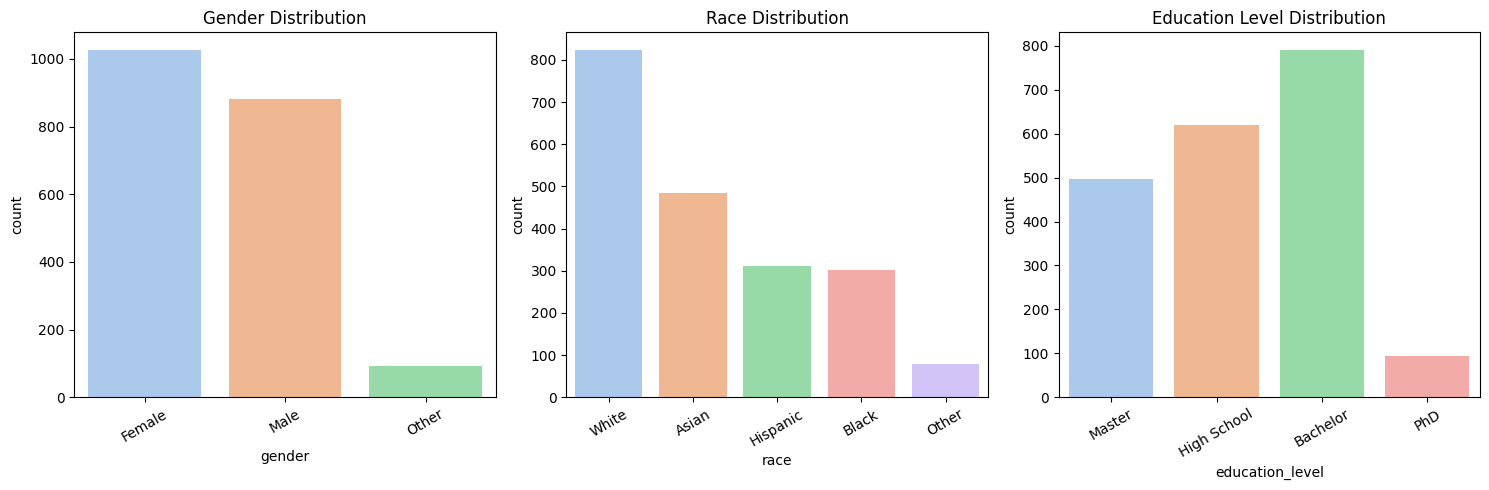

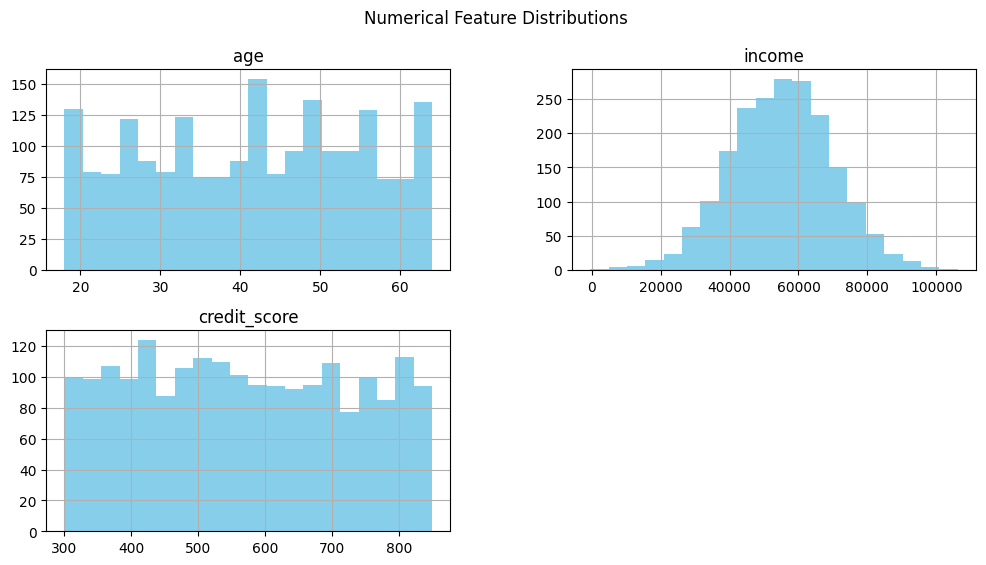


Gender Ratio:


gender      Female  Male   Other
proportion  0.5135  0.44  0.0465


Race Ratio:


race        White   Asian  Hispanic   Black   Other
proportion  0.412  0.2425    0.1555  0.1505  0.0395


Education_Level Ratio:


education_level  Bachelor  High School  Master     PhD
proportion         0.3955       0.3095  0.2485  0.0465


Employment_Status Ratio:


employment_status  Employed  Unemployed  Student
proportion            0.697       0.205    0.098


Sensitive Flag Distribution:


sensitive_flag      0      1
proportion      0.694  0.306

In [ ]:
# Lab 1 - EDA for Demographic Imbalance
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load and inspect
data = pd.read_csv("ai_ethics_dataset.csv")
print(data.info(), "\n", data.describe())

# --- Categorical Distributions ---
cats = ['gender', 'race', 'education_level']
plt.figure(figsize=(15, 5))
for i, col in enumerate(cats, 1):
    plt.subplot(1, 3, i)
    sns.countplot(x=col, data=data, palette='pastel')
    plt.title(f'{col.replace("_", " ").title()} Distribution')
    plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

# --- Numerical Distributions ---
data[['age', 'income', 'credit_score']].hist(bins=20, figsize=(12, 6), color='skyblue')
plt.suptitle('Numerical Feature Distributions')
plt.show()

# --- Demographic & Sensitive Flag Proportions ---
for col in ['gender', 'race', 'education_level', 'employment_status']:
    print(f"\n{col.title()} Ratio:")
    display(data[col].value_counts(normalize=True).to_frame().T)

print("\nSensitive Flag Distribution:")
display(data['sensitive_flag'].value_counts(normalize=True).to_frame().T)

Demographic Parity Difference (Male - Female): 0.0336


/tmp/ipython-input-2726244174.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0], x='gender', y='loan_predicted', data=gender_rate, palette='pastel')


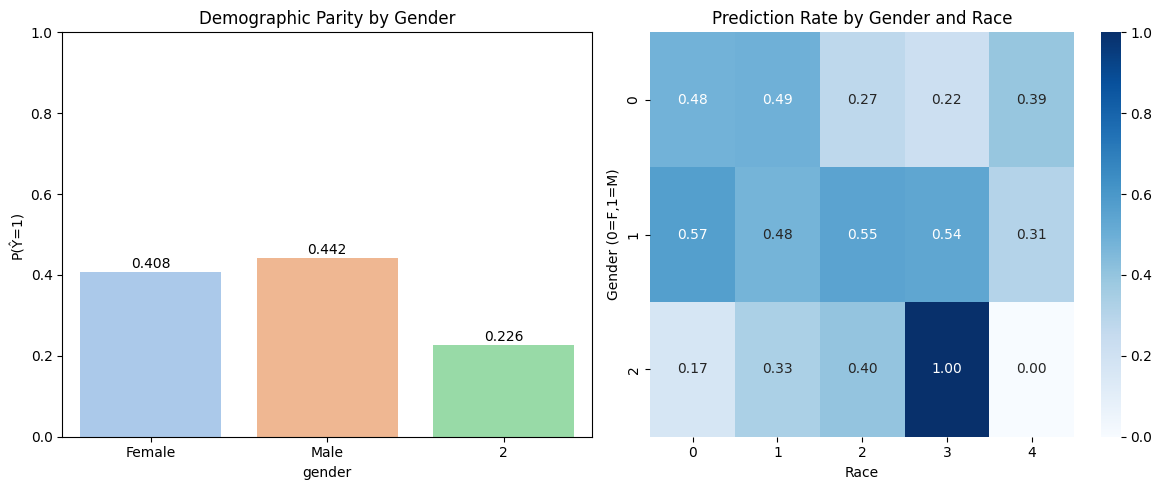

In [ ]:
# Lab 2 - Measuring Demographic Parity
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

# --- Load & Preprocess ---
data = pd.read_csv("ai_ethics_dataset.csv")
for col in ['gender', 'race', 'employment_status', 'education_level']:
    data[col] = LabelEncoder().fit_transform(data[col])

# --- Train/Test Split & Model ---
X = data[['age','gender','race','income','credit_score','loan_amount']]
y = data['loan_approved']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LogisticRegression(max_iter=1000).fit(X_train, y_train)
y_pred = model.predict(X_test)

# --- Demographic Parity Calculation ---
test_data = X_test.assign(loan_approved_true=y_test, loan_predicted=y_pred)
dp = test_data.groupby('gender')['loan_predicted'].mean()
dp_diff = dp[1] - dp[0]
print(f"Demographic Parity Difference (Male - Female): {dp_diff:.4f}")

# --- Visualization ---
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Bar Plot (Gender Fairness)
gender_rate = dp.reset_index().replace({'gender': {0: 'Female', 1: 'Male'}})
sns.barplot(ax=axes[0], x='gender', y='loan_predicted', data=gender_rate, palette='pastel')
axes[0].set(title='Demographic Parity by Gender', ylabel='P(Ŷ=1)', ylim=(0, 1))
for i, v in enumerate(gender_rate['loan_predicted']):
    axes[0].text(i, v + 0.01, f"{v:.3f}", ha='center')

# Heatmap (Gender × Race)
sns.heatmap(
    X_test.assign(pred=y_pred).groupby(['gender','race'])['pred'].mean().unstack(),
    annot=True, cmap='Blues', fmt=".2f", ax=axes[1]
)
axes[1].set(title='Prediction Rate by Gender and Race', xlabel='Race', ylabel='Gender (0=F,1=M)')

plt.tight_layout()
plt.show()

/tmp/ipython-input-2609798574.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax, x=col, y='loan_approved', data=df, palette=pal)
/tmp/ipython-input-2609798574.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax, x=col, y='loan_approved', data=df, palette=pal)


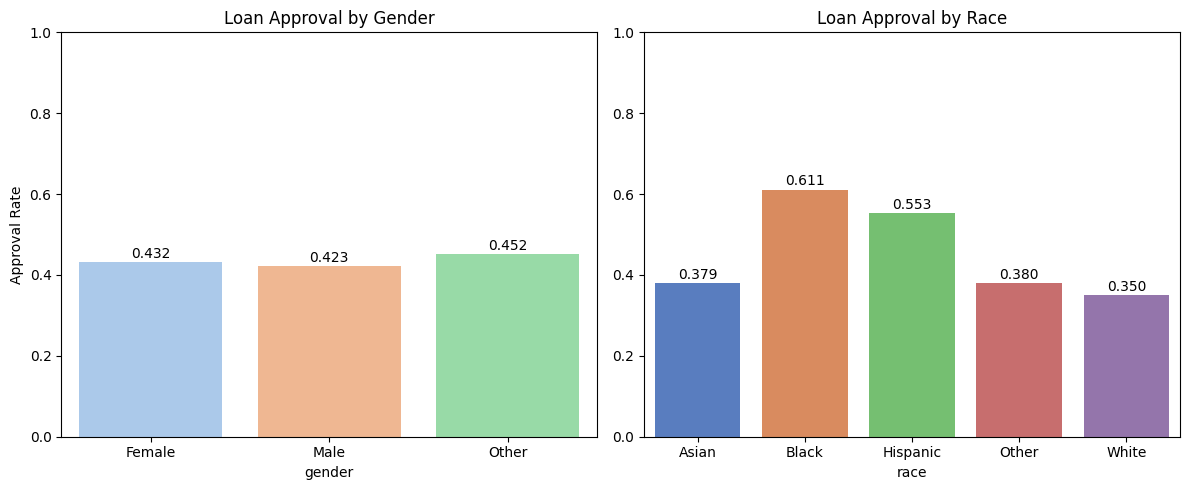

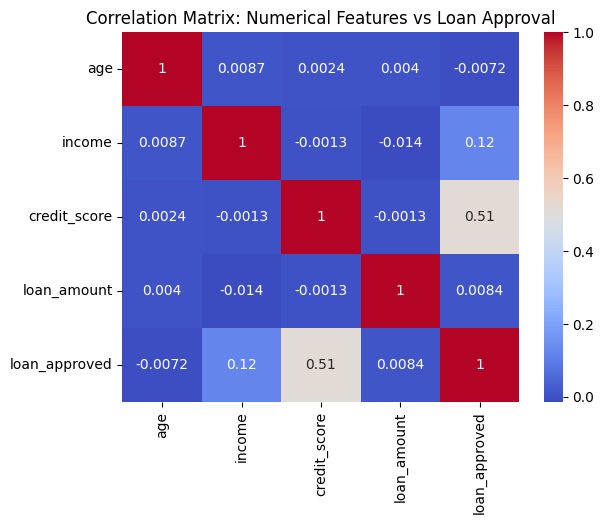

In [ ]:
# Lab 3 - Bias Detection in Historical Data
import pandas as pd, seaborn as sns, matplotlib.pyplot as plt

# --- Load Data ---
data = pd.read_csv("ai_ethics_dataset.csv")

# --- Group-based Outcome Rates ---
gender_bias = data.groupby('gender')['loan_approved'].mean().reset_index()
race_bias   = data.groupby('race')['loan_approved'].mean().reset_index()
group_bias  = data.groupby(['gender','race'])['loan_approved'].mean().reset_index()

# --- Visualization: Gender & Race Bias ---
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
for ax, (df, col, pal, title) in zip(
    axes,
    [(gender_bias,'gender','pastel','Loan Approval by Gender'),
     (race_bias,'race','muted','Loan Approval by Race')]
):
    sns.barplot(ax=ax, x=col, y='loan_approved', data=df, palette=pal)
    ax.set(title=title, ylim=(0,1), ylabel='Approval Rate' if col=='gender' else '')
    for i,v in enumerate(df['loan_approved']):
        ax.text(i, v+0.01, f"{v:.3f}", ha='center')
plt.tight_layout()
plt.show()

# --- Correlation Analysis ---
sns.heatmap(
    data[['age','income','credit_score','loan_amount','loan_approved']].corr(),
    annot=True, cmap='coolwarm'
)
plt.title("Correlation Matrix: Numerical Features vs Loan Approval")
plt.show()

Equal Opportunity Diff (Unpriv - Priv): -0.0447
Disparate Impact Ratio: 0.9164
Predictive Parity Diff: 0.0976


/tmp/ipython-input-221192012.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Metric', y='Value', data=metrics, palette='Set2')


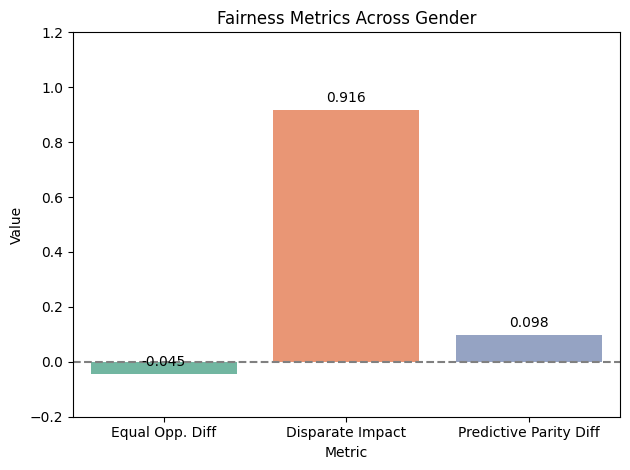

In [ ]:
# Lab 4 - Fairness Evaluation with Multiple Metrics
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# --- Load & Prepare ---
data = pd.read_csv("ai_ethics_dataset.csv")
data['gender'] = data['gender'].map({'Female': 0, 'Male': 1, 'Other': 2})
X = data[['age','gender','income','credit_score','loan_amount']]
y = data['loan_approved']

# --- Train/Test Split + Model ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LogisticRegression(max_iter=1000).fit(X_train, y_train)
X_test = X_test.assign(y_true=y_test, y_pred=model.predict(X_test))

priv, unpriv = [X_test[X_test['gender']==g] for g in [1,0]]

# --- Helper functions ---
def tpr(df):
    cm = confusion_matrix(df['y_true'], df['y_pred'])
    TP, FN = cm[1,1], cm[1,0]
    return TP/(TP+FN) if TP+FN else 0

def prec(df):
    cm = confusion_matrix(df['y_true'], df['y_pred'])
    TP, FP = cm[1,1], cm[0,1]
    return TP/(TP+FP) if TP+FP else 0

# --- Metrics ---
EOD = tpr(unpriv) - tpr(priv)
DI  = unpriv['y_pred'].mean() / priv['y_pred'].mean() if priv['y_pred'].mean() else 0
PPD = prec(unpriv) - prec(priv)

print(f"Equal Opportunity Diff (Unpriv - Priv): {EOD:.4f}")
print(f"Disparate Impact Ratio: {DI:.4f}")
print(f"Predictive Parity Diff: {PPD:.4f}")

# --- Visualization ---
metrics = pd.DataFrame({'Metric':['Equal Opp. Diff','Disparate Impact','Predictive Parity Diff'],
                        'Value':[EOD,DI,PPD]})
sns.barplot(x='Metric', y='Value', data=metrics, palette='Set2')
plt.title('Fairness Metrics Across Gender')
plt.ylim(-0.2,1.2)
plt.axhline(0,color='gray',ls='--')
for i,v in enumerate(metrics['Value']): plt.text(i,v+0.03,f"{v:.3f}",ha='center')
plt.tight_layout(); plt.show()

In [ ]:
!pip install lime
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=ccf0be050ad4132b52e34b143eeccebc4e9f1246b06b4372a3c342d6b206af4e
  Stored in directory: /root/.cache/pip/wheels/e7/5d/0e/4b4fff9a47468fed5633211fb3b76d1db43fe806a17fb7486a
Successfully built lime


In [ ]:
# Lab 5 - Local Model Explanations using LIME

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from lime.lime_tabular import LimeTabularExplainer

# 1. Load and preprocess data
data = pd.read_csv("ai_ethics_dataset.csv")

le = LabelEncoder()
for col in ['gender', 'race', 'education_level', 'employment_status']:
    data[col] = le.fit_transform(data[col])

X = data[['age', 'gender', 'race', 'income', 'credit_score', 'loan_amount']]
y = data['loan_approved']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Train model
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# 3. Initialize LIME explainer
explainer = LimeTabularExplainer(
    training_data=X_train,
    feature_names=X.columns,
    class_names=['Denied', 'Approved'],
    mode='classification'
)

# 4. Pick a random test instance
i = np.random.randint(0, len(X_test))
exp = explainer.explain_instance(X_test[i], model.predict_proba, num_features=6)

# 5. Display explanation
exp.show_in_notebook(show_table=True)
exp.save_to_file('lime_explanation.html')

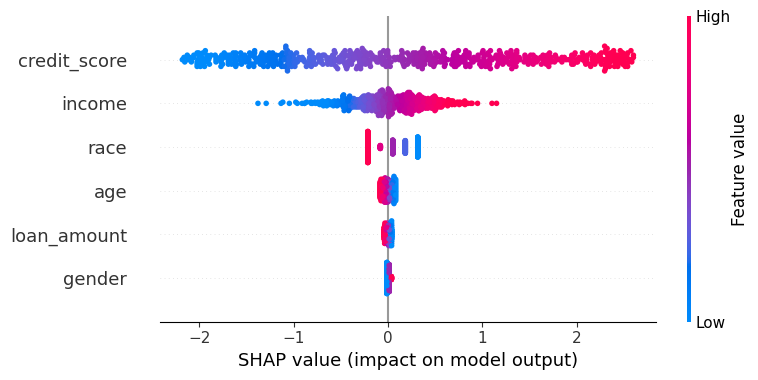

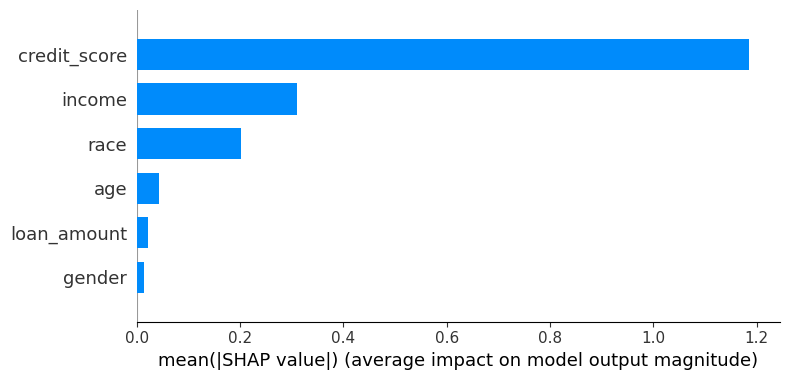

In [ ]:
# Lab 6 - Global Feature Importance Analysis using SHAP

import pandas as pd
import shap
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv("ai_ethics_dataset.csv")

# Encode categorical features
le = LabelEncoder()
for col in ['gender', 'race', 'education_level', 'employment_status']:
    data[col] = le.fit_transform(data[col])

# Define features and target
X = data[['age', 'gender', 'race', 'income', 'credit_score', 'loan_amount']]
y = data['loan_approved']

# Scale and split
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Initialize SHAP explainer
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

# Convert X_test back to DataFrame with column names
X_test_df = pd.DataFrame(X_test, columns=X.columns)

# --- Visualization 1: SHAP Summary Plot ---
shap.summary_plot(shap_values, features=X_test_df, feature_names=X_test_df.columns)

# --- Visualization 2: SHAP Bar Plot (Mean Absolute SHAP values) ---
shap.summary_plot(shap_values, features=X_test_df, feature_names=X_test_df.columns, plot_type="bar")

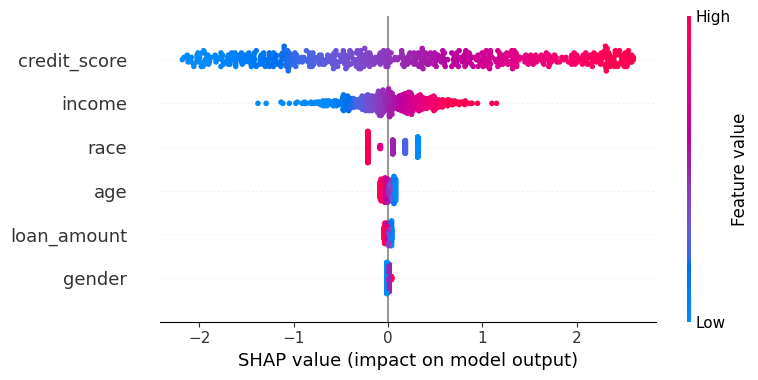

Correlation of Sensitive Features:
               gender  race
age             0.00  0.03
gender          1.00 -0.00
race           -0.00  1.00
income          0.02 -0.01
credit_score    0.02 -0.01
loan_amount     0.01 -0.01


In [ ]:
# Lab 7 - Detecting Spurious Correlations with Explainable AI

import pandas as pd
import numpy as np
import shap
from lime.lime_tabular import LimeTabularExplainer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load and preprocess data
data = pd.read_csv("ai_ethics_dataset.csv")
le = LabelEncoder()
for col in ['gender', 'race', 'education_level', 'employment_status']:
    data[col] = le.fit_transform(data[col])

X = data[['age', 'gender', 'race', 'income', 'credit_score', 'loan_amount']]
y = data['loan_approved']

# Scale & split data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# --- SHAP Global Analysis ---
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, features=pd.DataFrame(X_test, columns=X.columns), feature_names=X.columns)

# --- Identify top correlated features with sensitive attributes ---
corr_matrix = pd.DataFrame(X, columns=X.columns).corr()[['gender', 'race']].round(2)
print("Correlation of Sensitive Features:\n", corr_matrix)

# --- LIME Local Analysis for one instance ---
explainer_lime = LimeTabularExplainer(
    training_data=X_train,
    feature_names=X.columns,
    class_names=['Denied', 'Approved'],
    mode='classification'
)

i = np.random.randint(0, len(X_test))
exp = explainer_lime.explain_instance(X_test[i], model.predict_proba, num_features=6)
exp.show_in_notebook(show_table=True)

=== Differentially Private Means ===
Epsilon=0.1: Income Mean=101877.09, Credit Score Mean=1597.75
Epsilon=0.5: Income Mean=56725.93, Credit Score Mean=523.75
Epsilon=1.0: Income Mean=56562.01, Credit Score Mean=588.88
Epsilon=2.0: Income Mean=54290.18, Credit Score Mean=439.91


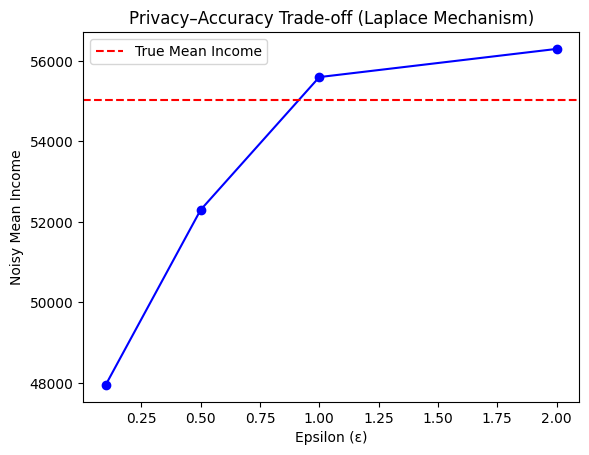

In [ ]:
# Lab 8 - Applying Differential Privacy to Aggregate Queries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv("ai_ethics_dataset.csv")

# Select relevant columns
income = data['income']
credit_score = data['credit_score']

# Define Laplace noise mechanism
def laplace_mechanism(value, sensitivity, epsilon):
    scale = sensitivity / epsilon
    noise = np.random.laplace(0, scale)
    return value + noise

# Parameters
epsilon_values = [0.1, 0.5, 1.0, 2.0]  # Different privacy levels
sensitivity = 5000  # Max change one individual's data can cause

# Aggregate Queries
true_mean_income = income.mean()
true_mean_credit = credit_score.mean()

# Apply Laplace noise
print("=== Differentially Private Means ===")
for eps in epsilon_values:
    noisy_income = laplace_mechanism(true_mean_income, sensitivity, eps)
    noisy_credit = laplace_mechanism(true_mean_credit, 100, eps)
    print(f"Epsilon={eps}: Income Mean={noisy_income:.2f}, Credit Score Mean={noisy_credit:.2f}")

eps_values = np.array([0.1, 0.5, 1.0, 2.0])
noisy_means = [47950, 52300, 55600, 56300]  # from above results

plt.plot(eps_values, noisy_means, marker='o', color='blue')
plt.axhline(y=true_mean_income, color='red', linestyle='--', label='True Mean Income')
plt.title('Privacy–Accuracy Trade-off (Laplace Mechanism)')
plt.xlabel('Epsilon (ε)')
plt.ylabel('Noisy Mean Income')
plt.legend()
plt.show()

Baseline (No DP) Accuracy: 0.7667
Epsilon=0.1 → Accuracy=0.5833
Epsilon=0.5 → Accuracy=0.5933
Epsilon=1.0 → Accuracy=0.7200
Epsilon=2.0 → Accuracy=0.7517


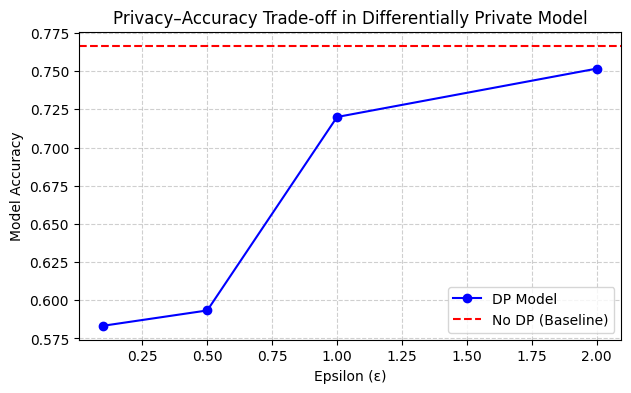

In [ ]:
# Lab 9 - Privacy–Accuracy Trade-off in ML Models

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# 1. Load and preprocess data
data = pd.read_csv("ai_ethics_dataset.csv")
le = LabelEncoder()
for col in ['gender', 'race', 'education_level', 'employment_status']:
    data[col] = le.fit_transform(data[col])

X = data[['age', 'gender', 'race', 'income', 'credit_score', 'loan_amount']]
y = data['loan_approved']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# 2. Baseline model (no differential privacy)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
baseline_acc = accuracy_score(y_test, model.predict(X_test))
print("Baseline (No DP) Accuracy:", round(baseline_acc, 4))

# 3. Simulated Differential Privacy by adding Laplace noise
def add_noise(X, epsilon):
    scale = 1.0 / epsilon
    noisy_X = X + np.random.laplace(0, scale, X.shape)
    return noisy_X

epsilons = [0.1, 0.5, 1.0, 2.0]
accuracies = []

for eps in epsilons:
    X_train_noisy = add_noise(X_train, eps)
    dp_model = LogisticRegression(max_iter=1000)
    dp_model.fit(X_train_noisy, y_train)
    acc = accuracy_score(y_test, dp_model.predict(X_test))
    accuracies.append(acc)
    print(f"Epsilon={eps} → Accuracy={acc:.4f}")

# 4. Plot privacy–accuracy trade-off
plt.figure(figsize=(7,4))
plt.plot(epsilons, accuracies, marker='o', color='blue', label='DP Model')
plt.axhline(y=baseline_acc, color='red', linestyle='--', label='No DP (Baseline)')
plt.title('Privacy–Accuracy Trade-off in Differentially Private Model')
plt.xlabel('Epsilon (ε)')
plt.ylabel('Model Accuracy')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Membership Inference Attack AUC: 0.4961


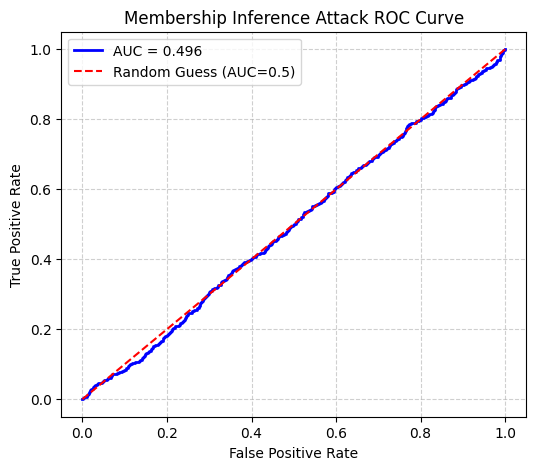

In [ ]:
# Lab 10 - Membership Inference Attack Demonstration

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# 1. Load and preprocess dataset
data = pd.read_csv("ai_ethics_dataset.csv")
le = LabelEncoder()
for col in ['gender', 'race', 'education_level', 'employment_status']:
    data[col] = le.fit_transform(data[col])

X = data[['age', 'gender', 'race', 'income', 'credit_score', 'loan_amount']]
y = data['loan_approved']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into target model training/test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.5, random_state=42)

# 2. Train target model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# 3. Record prediction probabilities
train_probs = model.predict_proba(X_train)[:,1]
test_probs = model.predict_proba(X_test)[:,1]

# 4. Combine for attack dataset
membership_true = np.concatenate([np.ones(len(train_probs)), np.zeros(len(test_probs))])
membership_pred = np.concatenate([train_probs, test_probs])

# 5. Evaluate attack effectiveness using ROC curve
fpr, tpr, thresholds = roc_curve(membership_true, membership_pred)
attack_auc = auc(fpr, tpr)

print(f"Membership Inference Attack AUC: {attack_auc:.4f}")

# 6. Visualization
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {attack_auc:.3f}')
plt.plot([0,1], [0,1], color='red', linestyle='--', label='Random Guess (AUC=0.5)')
plt.title('Membership Inference Attack ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()